In [1]:
from sympy import *
init_printing()

In [2]:
from sympsi import *
from sympsi.boson import *
from sympsi.pauli import *

In [3]:
omega_c, Omega, g, Delta, t, x, Hsym = symbols("omega_c, Omega, g, Delta, t, x, H")

In [4]:
sx, sy, sz, sm, sp = SigmaX(), SigmaY(), SigmaZ(), SigmaMinus(), SigmaPlus()
a = BosonOp("a")

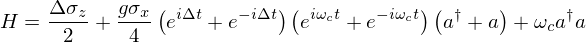

In [5]:
H = omega_c * Dagger(a) * a + Delta / 2 * sz 
H = H + g / 4 *  (exp(- I * omega_c * t) + exp( I * omega_c * t)) * (exp(- I * Delta * t) + exp( I * Delta * t)) * sx * (a + Dagger(a))

Eq(Hsym, H)

CHECK HAMILTONIAN

C:\Anaconda3\lib\site-packages\sympsi\qutility.py:482: UserWarning: Too high level or recursion, aborting
  warnings.warn("Too high level or recursion, aborting")


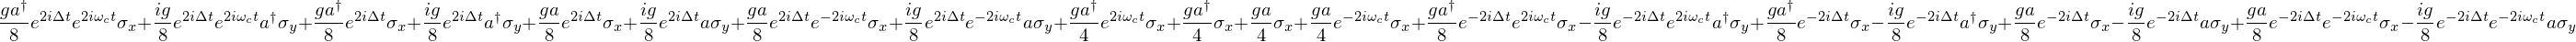

In [6]:
U = exp( I * omega_c * t * Dagger(a) * a + I * Delta / 2 * t * sz)

H_temp = hamiltonian_transformation(U, H.expand())
H_temp_2 = H_temp.subs(cos(Delta * t),(exp(I * Delta * t) + exp(-I * Delta * t))/2).expand()
H_temp_3 = H_temp_2.subs(sin(Delta * t),(exp(I * Delta * t) - exp(-I * Delta * t))/(2*I)).expand()
H_U = qsimplify(H_temp_3.expand())
H_U

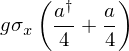

In [7]:
H_0 = drop_terms_containing(H_U, [exp(2 * I * (Delta) * t),
                               exp(- 2 * I * (Delta) * t),
                               exp(2 * I * (omega_c) * t),
                               exp(- 2 * I * (omega_c) * t)])
H_0 = qsimplify(H_0.expand())
H_0 = collect(H_0, [sx])
H_0 = collect(H_0, [g / 4])
H_0

In [9]:
# redefine H above
H_0 = g / 4 * sx * (a + Dagger(a))

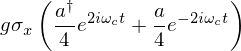

In [10]:
H_01 = H_U - H_0
H_01 = drop_terms_containing(H_01, [exp(2 * I * (Delta) * t),
                               exp(- 2 * I * (Delta) * t)])
H_01 = qsimplify(H_01.expand())
H_01 = collect(H_01, [sx])
H_01 = collect(H_01, [g / 4])
H_01

In [11]:
# redefine H above
H_0_1 = g / 4 * sx * Dagger(a)
H_0_m1 = g / 4 * sx * a

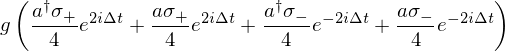

In [12]:
H_10 = H_U - H_0
H_10 = drop_terms_containing(H_10, [exp(2 * I * (omega_c) * t),
                               exp(- 2 * I * (omega_c) * t)])
H_temp = H_10.subs(sx,sp+sm).expand()
H_temp = H_temp.subs(sy,I * (sm - sp)).expand()
H_10 = qsimplify(H_temp.expand())
H_10 = collect(H_10, [sx])
H_10 = collect(H_10, [g / 4])
H_10

In [13]:
# redefine H above
H_1_0 = g / 4 * ((Dagger(a) + a) * sp)
H_m1_0 = g / 4 * ((Dagger(a) + a) * sm)

C:\Anaconda3\lib\site-packages\sympsi\qutility.py:482: UserWarning: Too high level or recursion, aborting
  warnings.warn("Too high level or recursion, aborting")


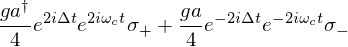

In [14]:
H_temp = H_U - H_0 - H_10 - H_01
H_temp = H_temp.subs(sx,sp+sm).expand()
H_temp = H_temp.subs(sy,I * (sm - sp)).expand()
H_temp = drop_terms_containing(H_temp, [exp(2 * I * (omega_c) * t) *  exp(- 2 * I * (Delta) * t),
                                       exp(-2 * I * (omega_c) * t) *  exp(2 * I * (Delta) * t)])
H_1_1 = qsimplify(H_temp.expand())
H_1_1

In [15]:
# redefine H above
H_1_1 = g / 4 * sp  * Dagger(a)
H_m1_m1 = g / 4 * sm * a

C:\Anaconda3\lib\site-packages\sympsi\qutility.py:482: UserWarning: Too high level or recursion, aborting
  warnings.warn("Too high level or recursion, aborting")


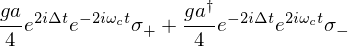

In [16]:
H_temp = H_U - H_0 - H_10 - H_01
H_temp = H_temp.subs(sx,sp+sm).expand()
H_temp = H_temp.subs(sy,I * (sm - sp)).expand()
H_temp = drop_terms_containing(H_temp, [exp(2 * I * (omega_c) * t) *  exp(2 * I * (Delta) * t),
                                       exp(-2 * I * (omega_c) * t) *  exp(-2 * I * (Delta) * t)])
H_1_m1 = qsimplify(H_temp.expand())
H_1_m1

In [17]:
# redefine H above
H_1_m1 = g / 4 * sp * a
H_m1_1 = g / 4 * sm * Dagger(a)

CHECK VAN VLECK

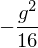

In [28]:
comm_a = Commutator(H_0_1, H_0_m1).expand(commutator=True).expand(commutator=True).doit()

comm_a

In [29]:
comm_a = Commutator(H_0_1, H_0_m1).expand(commutator=True).expand(commutator=True).expand(commutator=True).doit()
comm_b = Commutator(H_1_0, H_m1_0).expand(commutator=True).expand(commutator=True).expand(commutator=True).doit()
comm_c = Commutator(H_1_1, H_m1_m1).expand(commutator=True).expand(commutator=True).expand(commutator=True).doit()
comm_d = Commutator(H_1_m1, H_m1_1).expand(commutator=True).expand(commutator=True).expand(commutator=True).doit()

In [30]:
res = comm_a / (2 * omega_c) + comm_b / (2 * Delta) + comm_c / (2 * Delta + 2 * omega_c) + comm_d / (2 * Delta - 2 * omega_c)

In [31]:
res_temp = res.subs(sm * sp,1/2* (1-sz)).expand()
res_temp =res_temp.subs(sm * sp,1/2* (1-sz)).expand()

In [32]:
qsimplify(res_temp)
res_temp = drop_c_number_terms(res_temp)

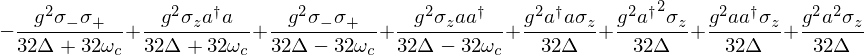

In [33]:
collect(res_temp,[sz])
collect(res_temp,[sm * sp])

In [34]:
res_temp = res.subs(sp,1/2 * (sx + I * sy)).expand()
res_temp = res.subs(sm,1/2 * (sx - I * sy)).expand()
res_temp = drop_c_number_terms(res_temp)

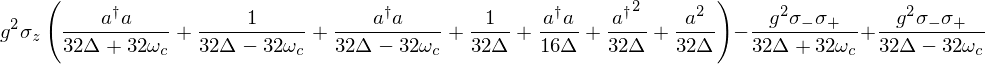

In [35]:
res_temp = res.subs(a*Dagger(a),1 +Dagger(a)*a ).expand()
res_temp = drop_c_number_terms(res_temp)
collect(res_temp,[g*sz])

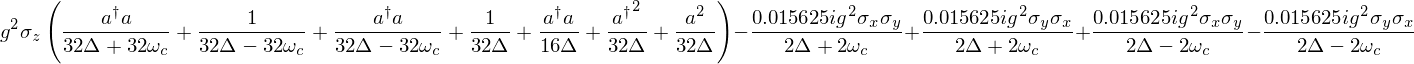

In [36]:
res_temp = res.subs(a*Dagger(a),1+Dagger(a)*a ).expand()
res_temp = res_temp.subs(sp,1/2 * (sx + I * sy)).expand()
res_temp = res_temp.subs(sm,1/2 * (sx - I * sy)).expand()
res_temp = drop_c_number_terms(res_temp)
res = collect(res_temp,[g*sz])
res

CHECK TILTED FRAME

In [37]:
comm_1 = Commutator(H_0, H_0_1).expand(commutator=True).expand(commutator=True).expand(commutator=True).doit()
comm_2 = Commutator(H_0, H_1_0).expand(commutator=True).expand(commutator=True).expand(commutator=True).doit()
comm_3 = Commutator(H_0, H_1_1).expand(commutator=True).expand(commutator=True).expand(commutator=True).doit()
comm_4 = Commutator(H_0, H_1_m1).expand(commutator=True).expand(commutator=True).expand(commutator=True).doit()

comm_5 = Commutator(H_0, H_0_m1).expand(commutator=True).expand(commutator=True).expand(commutator=True).doit()
comm_6 = Commutator(H_0, H_m1_0).expand(commutator=True).expand(commutator=True).expand(commutator=True).doit()
comm_7 = Commutator(H_0, H_m1_m1).expand(commutator=True).expand(commutator=True).expand(commutator=True).doit()
comm_8 = Commutator(H_0, H_m1_1).expand(commutator=True).expand(commutator=True).expand(commutator=True).doit()

In [38]:
res_2 = comm_1 / (2 * omega_c) + comm_2 / (2 * Delta) + comm_3 / (2 * Delta + 2 * omega_c) + comm_4 / (2 * Delta - 2 * omega_c)
res_2 = res_2 - comm_5 / (2 * omega_c) - comm_6 / (2 * Delta) - comm_7 / (2 * Delta + 2 * omega_c) - comm_8 / (2 * Delta - 2 * omega_c)

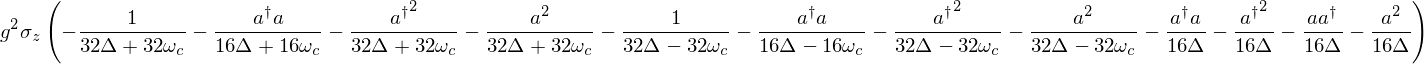

In [39]:
res_temp_2 = res_2.subs(a*Dagger(a),1+Dagger(a)*a ).expand()
res_temp_2 = res_temp_2.subs(sp,1/2 * (sx + I * sy)).expand()
res_temp_2 = res_temp_2.subs(sm,1/2 * (sx - I * sy)).expand()
res_temp_2 = drop_c_number_terms(res_temp_2)
res_2 = collect(res_temp_2,[g*sz])
res_2

CHECK FULL FINAL HAMILTONIAN

In [29]:
final = collect(res + res_2,[g * sz])

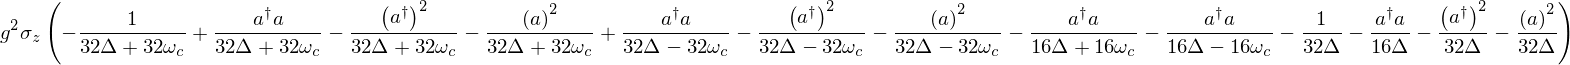

In [30]:
collect(final.subs(a * Dagger(a),1 + Dagger(a) * a).expand(),[g*sz])

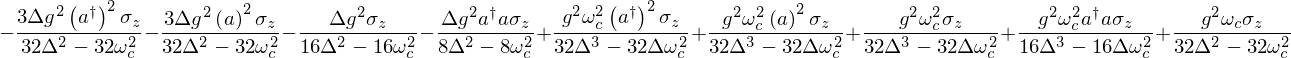

In [31]:
qsimplify(simplify(collect(final.subs(a * Dagger(a),1 + Dagger(a) * a).expand(),[g*sz])))

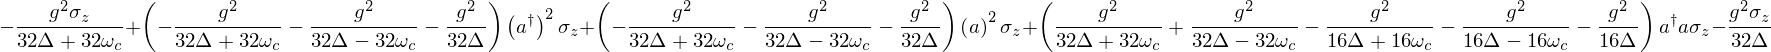

In [32]:
collect(final.subs(a * Dagger(a),1 + Dagger(a) * a).expand(),[Dagger(a) * a * sz,a**2 * sz,Dagger(a)**2*sz])